In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [9]:
solid_line = lambda x : (-14 / 3) * x + 14 / 3
data_range = np.array([-4, 12])
data_num = 100
noise_std = 0.5

In [10]:
x = np.random.uniform(data_range[0], data_range[1], size = data_num)
y = solid_line(x)

In [4]:
xn = x + np.random.normal(scale = noise_std, size = x.shape)
yn = y + np.random.normal(scale = noise_std, size = y.shape)

In [5]:
A = np.vstack((xn, np.ones(xn.shape))).T
b = yn
l_alg = np.matmul(np.linalg.pinv(A), b)
e_alg = np.mean(np.abs(l_alg[0] * xn - yn + l_alg[1]) / np.sqrt(l_alg[0] ** 2 + 1))

In [6]:
geo_dist2 = lambda x : np.sum((x[0] * xn - yn + x[1]) ** 2) / (x[0] ** 2 + 1)
result = minimize(geo_dist2, [-1, 0])
l_geo = result.x
e_geo = np.mean(np.abs(l_geo[0] * xn - yn + l_geo[1]) / np.sqrt(l_geo[0] ** 2 + 1))

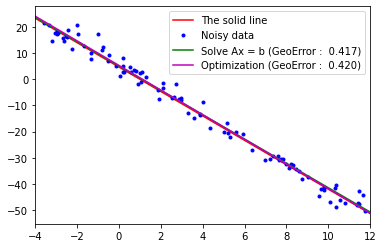

In [24]:
plt.plot(data_range, solid_line(data_range), 'r-', label='The solid line')
plt.plot(xn, yn, 'b.', label = 'Noisy data')
plt.plot(data_range, l_alg[0] * data_range + l_alg[1], 'g-', label = f'Solve Ax = b (GeoError : {e_alg : .3f})')
plt.plot(data_range, l_geo[0] * data_range + l_geo[1], 'm-', label = f'Optimization (GeoError : {e_geo : .3f})')
plt.legend()
plt.xlim(data_range)
plt.show()